In [22]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2 Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

print(np.shape(X))
print(np.shape(y))

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

print(np.shape(X))
print(np.shape(y))

#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf', C=1e2, gamma=0.1, epsilon=0.1) #others: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
regressor.fit(X,y)

#5 Predicting a new result
#y_pred = regressor.predict(6.5)

(10, 1)
(10, 1)
(10, 1)
(10, 1)


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=100.0, gamma=0.1)

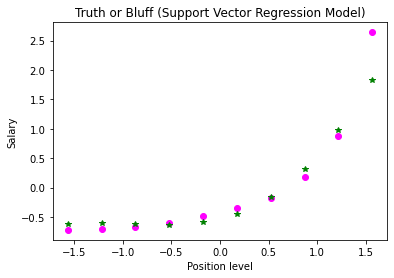

In [21]:
#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), '*',color = 'green')

plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [1]:
# ML Example
# Import libraries
# Pandas for data handling
import pandas as pd# https://pandas.pydata.org/

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy as np# https://numpy.org/

# MatPlotLib for visualization
import matplotlib.pyplot as plt  # https://matplotlib.org/

from sklearn import model_selection # for model comparisons

from sklearn.model_selection import train_test_split



import warnings

from sklearn.neural_network import MLPRegressor

In [2]:
x = np.linspace(1.0, 10.0, num=20, dtype=float)
a = np.linspace(0.1,0.2, num=20, dtype = float)
b = np.linspace(0.05,0.1, num=20, dtype = float)
c = np.linspace(0.01,0.02, num=20, dtype = float)
d = np.linspace(0.001,0.002, num=20, dtype = float)

y = a*x + b*x**2 + c*x**3 + d*x**4

s = pd.DataFrame([*zip(x,a,b,c,d,y)])
s.head()

,0,1,2,3,4,5
0,1.000000,0.100000,0.050000,0.010000,0.001000,0.161000
1,1.473684,0.105263,0.052632,0.010526,0.001053,0.308081
2,1.947368,0.110526,0.055263,0.011053,0.001105,0.522324
3,2.421053,0.115789,0.057895,0.011579,0.001158,0.823781
4,2.894737,0.121053,0.060526,0.012105,0.001211,1.236225


In [3]:
X = s.iloc[:,0:5]
Y = s.iloc[:,5]

seed = 42 

print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20   # means 20 percent
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

print('done \n')

Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



In [4]:
%%time
# Design the regressor neural network
mlp = MLPRegressor(hidden_layer_sizes=(20,10,5), # 3 hidden layers 20 , 10 and 5 neurons
                    activation = 'logistic',  # ReLU is the default option
                    solver='lbfgs',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init=1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=200,  # number of epochs, default=200
                    learning_rate = 'adaptive',
                    random_state=42,
                    verbose=10, 
                    )

# Train the regressor
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    model = mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

seed = 42 # setting the seed allows for repeatability

hyperparameters = {'max_depth':[7] }
model.fit(X_train, y_train)

predictions = model.predict(X_test)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          391     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96990D+02    |proj g|=  1.27026D+01

At iterate    1    f=  1.79067D+02    |proj g|=  1.12028D+01

At iterate    2    f=  1.16727D+02    |proj g|=  8.16863D-01

At iterate    3    f=  1.16383D+02    |proj g|=  8.53375D-01

At iterate    4    f=  1.15972D+02    |proj g|=  2.29206D-01

At iterate    5    f=  1.15672D+02    |proj g|=  1.83235D-01

At iterate    6    f=  1.14731D+02    |proj g|=  9.56382D-01

At iterate    7    f=  1.10656D+02    |proj g|=  3.33071D+00

At iterate    8    f=  1.08281D+02    |proj g|=  1.97638D+01

At iterate    9    f=  9.72288D+01    |proj g|=  1.00081D+01

At iterate   10    f=  6.09907D+01    |proj g|=  2.14705D+01

At iterate   11    f=  2.65866D+01    |proj g|=  1.54676D+01

At iterate   12    f=  2.24168D+01    |proj g|=  2.86871D+01

At iterate   13    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [5]:
accuracy=model.score(X_test, y_test)
print('Accuracy:',accuracy)

Accuracy: 0.9885334128504654


In [6]:
arr = np.array([5,0.3,0.06,0.03,0.01])
testing = model.predict(arr.reshape(1,-1))
print(testing)

[4.90674873]


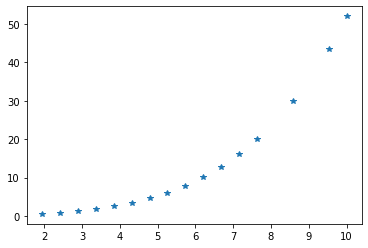

In [13]:
plt.figure()
plt.plot(X_train[0],y_train,'*')